## Датасет доступен тут - https://www.kaggle.com/aadilmalik94/animecharacterfaces

In [10]:
import torch
import torchvision as tv
import numpy as np

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [53]:
import ipywidgets as widgets

## Настройки

In [6]:
BATCH_SIZE = 128

## Вспомогательные функции

In [68]:
def show_imgs(imgs):
    assert len(imgs) == 16
    
    plt.figure(figsize=(4,4))
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0, hspace=0)
    for i in range(16):
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        fig = plt.imshow(np.clip(imgs[i].detach().cpu().permute(1,2,0), 0., 1.))
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

In [69]:
def show_random_images(dataset):
    indexes = np.random.choice(len(dataset), 16)
    to_show = []
    for i in indexes:
        to_show.append(dataset[i][0])
    show_imgs(to_show)

In [70]:
def show_generated_images(generator):
    indexes = np.random.choice(len(dataset), 16)
    to_show = generator(torch.rand((16, 128, 1, 1)))
    show_imgs(to_show)

## Загружаем данные

In [4]:
transforms = tv.transforms.Compose([
    tv.transforms.Resize(32),
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomRotation(10),
    tv.transforms.CenterCrop((32, 32)),
    tv.transforms.ToTensor()
])

In [5]:
dataset = tv.datasets.ImageFolder('anime_faces', transform=transforms)

In [8]:
loader = torch.utils.data.DataLoader(dataset, BATCH_SIZE, shuffle=True, num_workers=4)

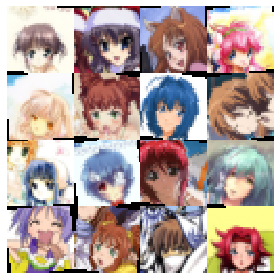

In [27]:
show_random_images(dataset)

## Делаем сетки

In [62]:
generator = torch.nn.Sequential(
    torch.nn.ConvTranspose2d(128, 64, (4,4), stride=2, padding=1),
    torch.nn.BatchNorm2d(64, momentum=0.5),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.ConvTranspose2d(64, 64, (4,4), stride=2, padding=1),
    torch.nn.BatchNorm2d(64, momentum=0.5),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.ConvTranspose2d(64, 32, (4,4), stride=2, padding=1),
    torch.nn.BatchNorm2d(32, momentum=0.5),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.ConvTranspose2d(32, 32, (4,4), stride=2, padding=1),
    torch.nn.BatchNorm2d(32, momentum=0.5),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.ConvTranspose2d(32, 3, (4,4), stride=2, padding=1),
    torch.nn.Tanh()
)

In [29]:
discriminator = torch.nn.Sequential(
    torch.nn.Conv2d(3, 32, kernel_size=(4,4), stride=2, padding=1),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.Conv2d(32, 32, kernel_size=(4,4), stride=2, padding=1),
    torch.nn.BatchNorm2d(32, momentum=0.5),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.Conv2d(32, 64, kernel_size=(4,4), stride=2, padding=1),
    torch.nn.BatchNorm2d(64, momentum=0.5),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.Conv2d(64, 64, kernel_size=(4,4), stride=2, padding=1),
    torch.nn.BatchNorm2d(64, momentum=0.5),
    torch.nn.LeakyReLU(0.2),
    
    torch.nn.AvgPool2d((2,2)),

    torch.nn.Flatten(),
    
    torch.nn.Linear(64, 1)
)

## Загружаем обученные веса

In [33]:
def load_generator_weights(model, epoch_num):
    model.load_state_dict(torch.load("results/generator{}.params".format(epoch_num), map_location=torch.device('cpu')))
    model.eval()
    return model

In [64]:
def interactive_show(generator, epoch_num):
    generator_loaded = load_generator_weights(generator, epoch_num)
    show_generated_images(generator_loaded)

In [72]:
widgets.interact(interactive_show, generator=widgets.fixed(generator), epoch_num=widgets.BoundedIntText(value=107, min=0, max=107))

interactive(children=(BoundedIntText(value=107, description='epoch_num', max=107), Output()), _dom_classes=('w…

<function __main__.interactive_show(generator, epoch_num)>